

<h2 id='part1'>A Look at the Data</h2>


First, let's read in the data and necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mok_py as t
import seaborn as sns
%matplotlib inline

df20 = pd.read_csv('./2020_survey_results_public.csv')
df20.head()

Respondent                                         MainBranch Hobbyist  \
0           1                     I am a developer by profession      Yes   
1           2                     I am a developer by profession       No   
2           3                        I code primarily as a hobby      Yes   
3           4                     I am a developer by profession      Yes   
4           5  I used to be a developer by profession, but no...      Yes   

    Age Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0   NaN         13  Monthly        NaN            NaN             Germany   
1   NaN         19      NaN        NaN            NaN      United Kingdom   
2   NaN         15      NaN        NaN            NaN  Russian Federation   
3  25.0         18      NaN        NaN            NaN             Albania   
4  31.0         16      NaN        NaN            NaN       United States   

     CurrencyDesc  ...                  SurveyEase           SurveyLength  \
0   European Euro  ...  Neither easy nor difficult  Appropriate in length   
1  Pound sterling  ...                         NaN                    NaN   
2             NaN  ...  Neither easy nor difficult  Appropriate in length   
3    Albanian lek  ...                         NaN                    NaN   
4             NaN  ...                        Easy              Too short   

  Trans                                     UndergradMajor  \
0    No  Computer science, computer engineering, or sof...   
1   NaN  Computer science, computer engineering, or sof...   
2   NaN                                                NaN   
3    No  Computer science, computer engineering, or sof...   
4    No  Computer science, computer engineering, or sof...   

  WebframeDesireNextYear    WebframeWorkedWith  \
0           ASP.NET Core  ASP.NET;ASP.NET Core   
1                    NaN                   NaN   
2                    NaN                   NaN   
3                    NaN                   NaN   
4   Django;Ruby on Rails         Ruby on Rails   

                              WelcomeChange WorkWeekHrs YearsCode YearsCodePro  
0   Just as welcome now as I felt last year        50.0        36           27  
1  Somewhat more welcome now than last year         NaN         7            4  
2  Somewhat more welcome now than last year         NaN         4          NaN  
3  Somewhat less welcome now than last year        40.0         7            4  
4   Just as welcome now as I felt last year         NaN        15            8  

[5 rows x 61 columns]

In [9]:
no_nulls = set(df20.columns[df20.isnull().mean() > 0.5])#Provide a set of columns with 0 missing values.

no_nulls


set()

<h3 id='q1'>What are the top languages used by the surveyed people along with the desired to be learned next year</h3>



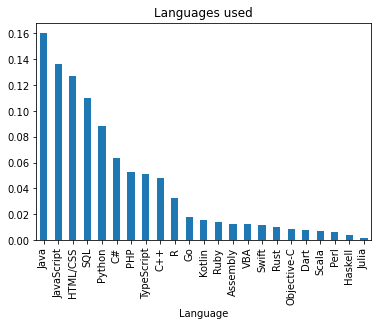

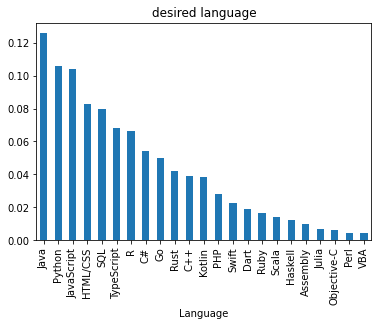

In [46]:
possible_language_vals = [ "Assembly", "Bash/Shell/PowerShell C", "C#", "C++", "Dart", "Go", "Haskell", "HTML/CSS", "Java", "JavaScript", "Julia", "Kotlin", "Objective-C", "Perl", "PHP", "Python", "R", "Ruby", "Rust", "Scala", "SQL", "Swift", "TypeScript", "VBA", "Other"]

def clean_and_plot(df, title='Languages used', plot=True, colName = 'LanguageWorkedWith'):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    language = df[colName].value_counts().reset_index()
    language.rename(columns={'index': 'Language', colName : 'count'}, inplace=True)
    language_df = t.total_count(language, 'Language', 'count', possible_language_vals)

    language_df.set_index('Language', inplace=True)
    if plot:
        (language_df/language_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_language_df = language_df/language_df.sum()
    return props_language_df


props_df = clean_and_plot(df20)

props_desired_df = clean_and_plot(df20, colName='LanguageDesireNextYear', title='desired language')






<h3 id='q1'>How the language used is compared to the ones desired next year? </h3>



In [53]:
comp_df = pd.merge(props_df, props_desired_df, left_index=True, right_index=True)
comp_df.columns = ['langUsed_perc', 'langDesired_perc']
comp_df['Diff_lang_Vals'] =  comp_df['langDesired_perc'] - comp_df['langUsed_perc']
comp_df.sort_values

comp_df = comp_df.iloc[comp_df.langDesired_perc.argsort()[::-1]]

comp_df.style.bar(subset=['Diff_lang_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])


<h3 id='q1'>Looking at the data for languages used and desired, is it different between developers by profession and others? </h3>



In [54]:

prof = df20[df20['MainBranch'] == "I am a developer by profession"] # Subset df to only to developer by profession  
notProf = df20[df20['MainBranch'] != "I am a developer by profession"] # Subset df to other than developer by proession



langUsed_prof_perc = clean_and_plot(prof, 'Developer by profession', plot=False)
langUsed_notProf_perc = clean_and_plot(notProf, 'Not prof', plot=False)


comp_df = pd.merge(langUsed_prof_perc, langUsed_notProf_perc, left_index=True, right_index=True)
comp_df.columns = ['langUsed_prof_perc', 'langUsed_notProf_perc']
comp_df['Diff_langUsed_Vals'] = comp_df['langUsed_prof_perc'] - comp_df['langUsed_notProf_perc']
comp_df.style.bar(subset=['Diff_langUsed_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])






In [12]:
#Desired Language

desiredLang_prof_perc = clean_and_plot(prof, 'Developer by profession', plot=False, colName='LanguageDesireNextYear')
desiredLang_notProf_perc = clean_and_plot(notProf, 'Not prof', plot=False, colName='LanguageDesireNextYear')

comp_df = pd.merge(desiredLang_prof_perc, desiredLang_notProf_perc, left_index=True, right_index=True)
comp_df.columns = ['desiredLang_prof_perc', 'desiredLang_notProf_perc']
comp_df['Diff_desiredLang_Vals'] = comp_df['desiredLang_prof_perc'] - comp_df['desiredLang_notProf_perc']
comp_df.style.bar(subset=['Diff_desiredLang_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])


<h3 id='q1'>How job seeking is compared across different segmentation?</h3>





In [77]:

def jobSeekValue(jobSeek_str):
    '''
    INPUT
        jobSeek_str - a string for the job seek string
    OUTPUT
        return 2 if "I am actively looking for a job"
        return 1 if "I’m not actively looking, but I am open to new opportunities"
        return 0 if "I am not interested in new job opportunities"
    
    '''
    if jobSeek_str == "I am actively looking for a job":    
        return 2
    elif jobSeek_str == "I’m not actively looking, but I am open to new opportunities": 
        return 0.5
    elif jobSeek_str == "I am not interested in new job opportunities": 
        return 0

df20['jobSeekValue'] = df20["JobSeek"].apply(jobSeekValue)

print(df20.groupby(['JobSat']).mean()['jobSeekValue'].sort_values(ascending=False))
print()
print(df20.groupby(['UndergradMajor']).mean()['jobSeekValue'].sort_values(ascending=False))


JobSat
Slightly dissatisfied                 0.857090
Very dissatisfied                     0.849971
Neither satisfied nor dissatisfied    0.748654
Slightly satisfied                    0.542743
Very satisfied                        0.305908
Name: jobSeekValue, dtype: float64

UndergradMajor
Web development or web design                                                     0.722368
Information systems, information technology, or system administration             0.674192
Another engineering discipline (such as civil, electrical, mechanical, etc.)      0.645798
A social science (such as anthropology, psychology, political science, etc.)      0.643204
Computer science, computer engineering, or software engineering                   0.638461
A business discipline (such as accounting, finance, marketing, etc.)              0.619007
Fine arts or performing arts (such as graphic design, music, studio art, etc.)    0.608833
A health science (such as nursing, pharmacy, radiology, etc.)         

<h3 id='q1'>Aside from compnensation, benefits and location, what factors are important when looking for a job?</h3>


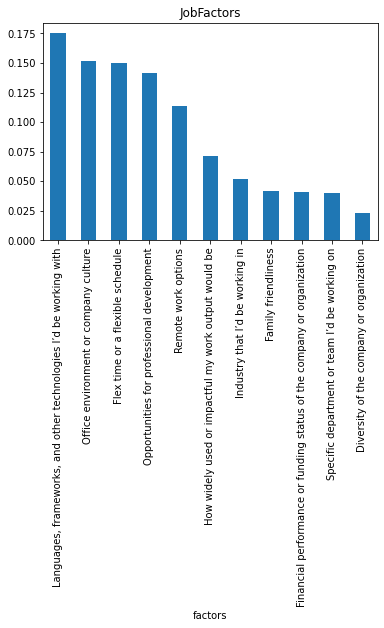

In [76]:
possible_factor_vals = [ "Remote work options", 
"Office environment or company culture", 
"Financial performance or funding status of the company or organization", 
"Opportunities for professional development", 
"Diversity of the company or organization",
"How widely used or impactful my work output would be", 
"Industry that I’d be working in", 
"Specific department or team I’d be working on", 
"Flex time or a flexible schedule", 
"Languages, frameworks, and other technologies I’d be working with", 
"Family friendliness"]

def clean_and_plot_factors(df, title='JobFactors', plot=True, colName = 'JobFactors'):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    factors = df[colName].value_counts().reset_index()
    factors.rename(columns={'index': 'factors', colName : 'count'}, inplace=True)
    factors_df = t.total_count(factors, 'factors', 'count', possible_factor_vals)

    factors_df.set_index('factors', inplace=True)
    if plot:
        (factors_df/factors_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_factors_df = factors_df/factors_df.sum()
    return props_factors_df


props_factorsssss_df = clean_and_plot_factors(df20)